In [ ]:
!pip install folium
!pip install pandas


In [ ]:
import folium
import pandas as pd

# 위도
latitude = 37.394946
# 경도
longitude = 127.111104

m = folium.Map(location=[latitude, longitude],
               zoom_start=17,
               width=750,
               height=500
              )
m = folium.Map(location=[35.13995836, 126.793668], zoom_start=12, tiles='Cartodb Positron')
m

In [ ]:
df = pd.read_excel('/content/광주위도경도.xlsx')
df.head()


#for name, lat, lng in zip(df['nursing facility'], df['latitude'], df['longitude']):
#    folium.Marker([lat, lng], popup=name).add_to(m)
#m

,Unnamed: 0,nursing facility,nursing staff,latitude,longitude
0,동구,74,731,35.146278,126.923090
1,서구,195,1634,35.152516,126.889506
2,남구,140,1396,35.133017,126.902557
3,북구,267,3322,35.181214,126.901081
4,광산구,214,3088,35.139958,126.793668


In [ ]:
for name, lat, lng in zip(df['nursing facility'], df['latitude'], df['longitude']):
    folium.CircleMarker([lat, lng], popup=name,
                        radius=30,     # 원의 반지름
                        color='skyblue', # 원의 둘레 색상
                        fill=True,
                        fill_color='skyblue', # 원을 채우는 색
                        fill_opacity=0.1  # 투명도
                        ).add_to(m)
m



In [ ]:
import pandas as pd
import json
import folium

# Load Excel data
df = pd.read_excel('/content/광주위도경도.xlsx')
df.columns = df.columns.map(str)

# Display column names to check the correct name
print(df.columns)

# Load GeoJSON data
geo_path = '/content/광주광역시.geojson'
with open(geo_path, 'r', encoding='utf-8') as file:
    geo_data = json.load(file)

# Check the first few rows of the data to understand its structure
print(df.head())

# Create map
g_map = folium.Map(location=[35.17, 126.75], zoom_start=12)



# Add Choropleth layer
folium.Choropleth(
    geo_data=geo_data,  # 지도 경계
    data=df,
    columns=['Region', df['nursing facility']],  # 지역명에 맞는 열 이름 사용
   #key_on='nursing facility',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    threshold_scale=[0,50,100,150,200,250,300],
    legend_name='Nursing Facility Count'
).add_to(g_map)

g_map


Index(['Region', 'nursing facility', 'nursing staff', 'latitude', 'longitude'], dtype='object')
  Region  nursing facility  nursing staff   latitude   longitude
0     동구                74            731  35.146278  126.923090
1     서구               195           1634  35.152516  126.889506
2     남구               140           1396  35.133017  126.902557
3     북구               267           3322  35.181214  126.901081
4    광산구               214           3088  35.139958  126.793668


KeyError: "None of [Index([74, 195, 140, 267, 214], dtype='int64')] are in the [columns]"

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# 데이터 파일 경로
file_path = '/content/장기요양병원.csv'

# CSV 파일 로드 (인코딩 지정)
data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
print(data.head())

# folium 지도 생성
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 병원의 수에 따라 지도에 진하게 표시
heat_data = [[row['latitude'], row['longitude'], row['nursing facility']] for index, row in data.iterrows()]

# HeatMap 생성
HeatMap(heat_data).add_to(m)

# 지도 저장 및 표시
m.save('long_term_care_hospitals.html')
m

heat_data = [[row['위도'], row['경도'], row['병원수']] for index, row in data.iterrows()]




AttributeError: 'DataFrame' object has no attribute 'to_file'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

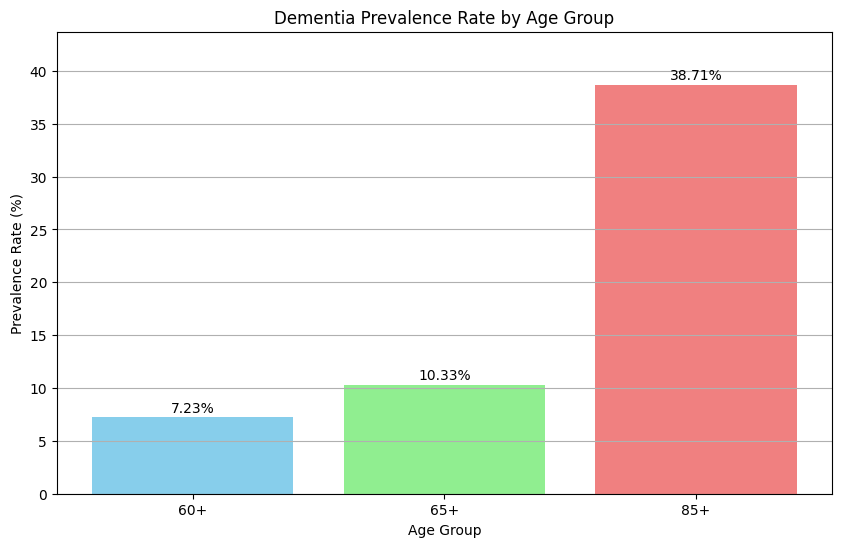

In [ ]:
# 데이터 파일 경로
file_path = '/content/노인치매.xlsx'

# 엑셀 파일 로드
data = pd.read_excel(file_path)

# 필요한 연령대만 필터링
age_groups = ['60+', '65+', '85+']
filtered_data = data[data['연령별'].isin(age_groups)]

# 연령대별 유병률 평균 계산
avg_prevalence = filtered_data.groupby('연령별')['치매환자유병률'].mean().reindex(age_groups)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(avg_prevalence.index, avg_prevalence.values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Dementia Prevalence Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Prevalence Rate (%)')
plt.ylim(0, max(avg_prevalence.values) + 5)
plt.grid(axis='y')

# 바 차트에 값 표시
for i, value in enumerate(avg_prevalence.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center')

plt.show()


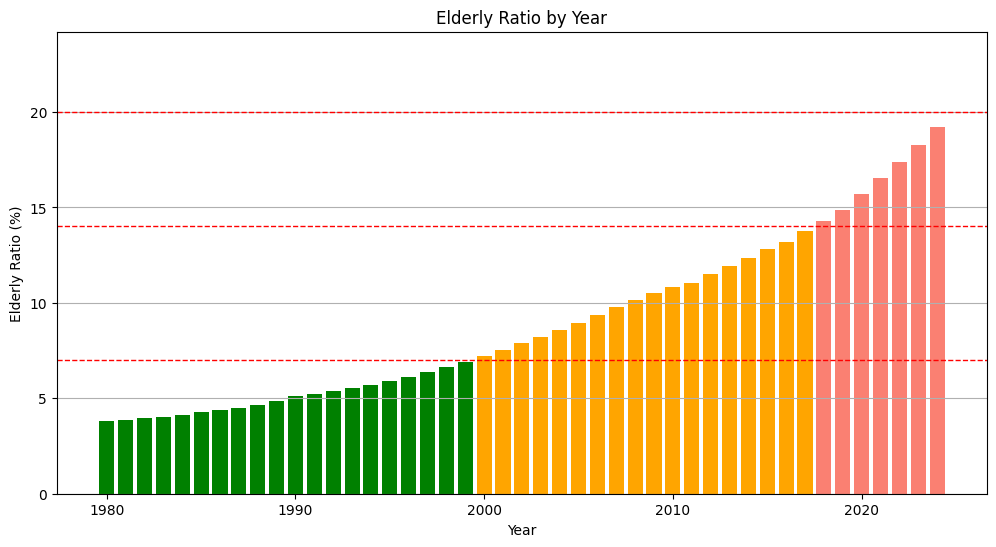

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
file_path = '/content/고령화통계.xlsx'

# 엑셀 파일 로드
data = pd.read_excel(file_path, header=None)

# 65세 이상 인구와 총 인구를 분리
years = data.iloc[0, 1:].astype(int)
total_population = data.iloc[1, 1:].astype(int)
age_65_plus = data.iloc[2, 1:].astype(int)

# 고령비율 계산 (백분율로 표시)
elderly_ratio = (age_65_plus / total_population) * 100

# 색상 설정
colors = []
for ratio in elderly_ratio:
    if ratio < 7:
        colors.append('green')
    elif ratio < 14:
        colors.append('orange')
    elif ratio < 20:
        colors.append('salmon')
    else:
        colors.append('red')

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(years, elderly_ratio, color=colors)
plt.title('Elderly Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Elderly Ratio (%)')
plt.ylim(0, max(elderly_ratio) + 5)
plt.grid(axis='y')

plt.axhline(y=7, color='red', linestyle='--', linewidth=1)
plt.axhline(y=14, color='red', linestyle='--', linewidth=1)
plt.axhline(y=20, color='red', linestyle='--', linewidth=1)


plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns

# 상관관계 계산
correlation_matrix = sales_earnings2.corr()
correlation_matrix.head()


# 상관관계 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# 히트맵 꾸미기
plt.title('Correlation Matrix of earnings & sales')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# 그래프 보여주기
plt.show()

NameError: name 'sales_earnings2' is not defined

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the provided Excel files
file_path_1 = '/content/65세이상_노인_질병소분류별_다빈도_상병_진료현황_계__20240726093401.xlsx'
file_path_2 = '/content/65세이상_노인_질병소분류별_입원_다빈도_상병_진료현황_계__20240726093703.xlsx'

# Load both sheets into dataframes
df1 = pd.read_excel(file_path_1)
df2 = pd.read_excel(file_path_2)

# Process the first dataframe to extract relevant columns and top 10 diseases for a specific year (2022)
df1_2022 = df1[['순위별(1)', '2022', '2022.1']].drop(0)
df1_2022.columns = ['Rank', 'Disease', 'Patients']
df1_2022['Patients'] = pd.to_numeric(df1_2022['Patients'], errors='coerce')
df1_2022_top10 = df1_2022.nlargest(10, 'Patients')

# Process the second dataframe to extract relevant columns and top 10 diseases for a specific year (2022)
df2_2022 = df2[['순위별(1)', '2022', '2022.1']].drop(0)
df2_2022.columns = ['Rank', 'Disease', 'Patients']
df2_2022['Patients'] = pd.to_numeric(df2_2022['Patients'], errors='coerce')
df2_2022_top10 = df2_2022.nlargest(10, 'Patients')

# Function to plot the data
def plot_top10_diseases(df, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(df['Disease'], df['Patients'], color=['red' if i < 4 else 'gray' for i in range(len(df))])
    ax.set_xlabel('Disease')
    ax.set_ylabel('Number of Patients')
    ax.set_title(title)
    plt.xticks(rotation=90)
    plt.show()

# Plot the data
plot_top10_diseases(df1_2022_top10, 'Top 10 Diseases - Outpatient Visits')
plot_top10_diseases(df2_2022_top10, 'Top 10 Diseases - Hospital Admissions')




FileNotFoundError: [Errno 2] No such file or directory: '/content/65세이상_노인_질병소분류별_다빈도_상병_진료현황_계__20240726093401.xlsx'

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


ValueError: Invalid RGBA argument: 'rgba(255, 0, 0, 0.5)'

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig

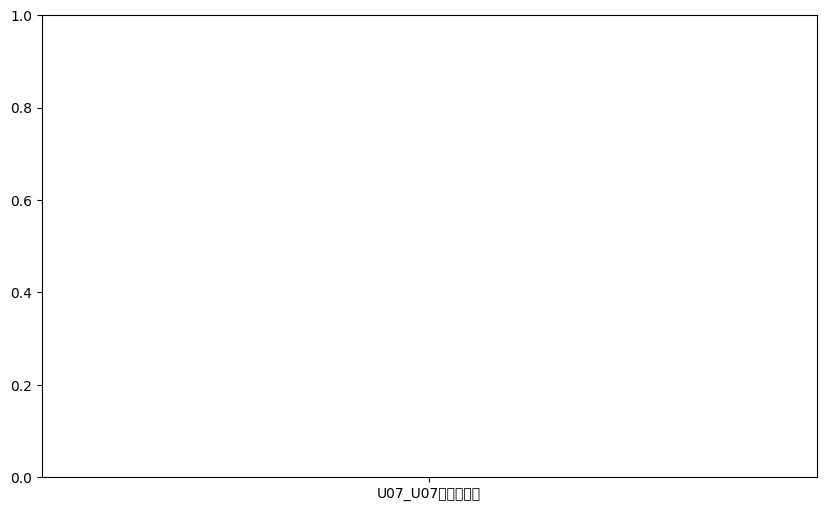